Erfan Panahi 810198369 \
# Intelligent Systems 

> Homework #1 - Part 3 ( **Support Vector Machines** )




In [1]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, multiclass
from mlxtend.plotting import plot_decision_regions

In [2]:
#@title Adding Datasets
iris = datasets.load_iris()
data = iris.data[:, :2] #data
label = iris.target #label

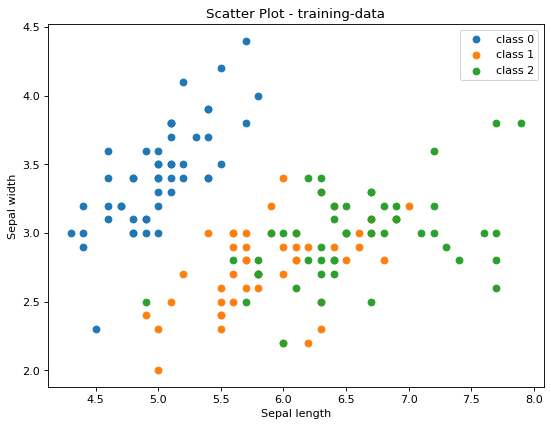

In [3]:
#@title Plotting Datasets
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data[label == 0,:][:,0],data[label == 0,:][:,1],label = 'class 0')
plt.scatter(data[label == 1,:][:,0],data[label == 1,:][:,1],label = 'class 1')
plt.scatter(data[label == 2,:][:,0],data[label == 2,:][:,1],label = 'class 2')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter Plot - training-data')
plt.legend()

In [4]:
#@title SVM and One-vs-Rest Implementation 
SVM = svm.SVC(kernel='linear', C=1)
SVM_OVR = multiclass.OneVsRestClassifier(SVM)
SVM_OVR.fit(data, label)
label_pred = SVM_OVR.predict(data)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Decision Regions')

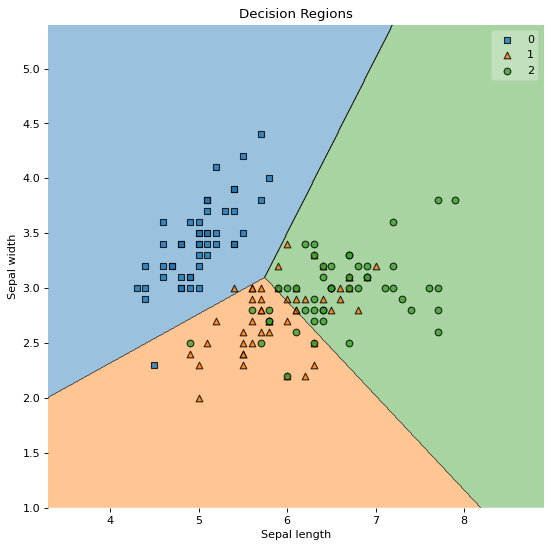

In [5]:
#@title Plotting Decision Regions
plt.figure(figsize=(8, 8), dpi=80)
plot_decision_regions(data, label, clf=SVM_OVR)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Regions')

In [6]:
#@title Accuracy, Confusion Matrix and Confidence Matrix
print("Accuracy (using SVM with One vs Rest Method): {}%\n".format(metrics.accuracy_score(label,label_pred)*100))
Confusion_matrix = metrics.confusion_matrix(label,label_pred)
Confidence_matrix =  Confusion_matrix / np.sum(Confusion_matrix,axis = 0)
print('Confusion Matrix: (rows: True Labels, columns: Predicted Labels)\n',Confusion_matrix,'\n\nConfidence Matrix:\n',Confidence_matrix)

Accuracy (using SVM with One vs Rest Method): 78.66666666666666%

Confusion Matrix: (rows: True Labels, columns: Predicted Labels)
 [[49  1  0]
 [ 1 28 21]
 [ 0  9 41]] 

Confidence Matrix:
 [[0.98       0.02631579 0.        ]
 [0.02       0.73684211 0.33870968]
 [0.         0.23684211 0.66129032]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


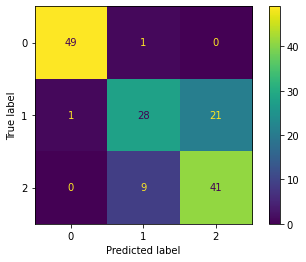

In [7]:
#@title Confusion Matrix Plot
metrics.plot_confusion_matrix(SVM_OVR, data, label)